<a href="https://colab.research.google.com/github/ChonnaveeSuk/TN_TTS_TON_Assignment-2-feb-25/blob/main/facebook_mms_tts_tha_Vs__lunarlist_tts_thai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Model : facebook/mms-tts-tha

In [ ]:
#@title Step 1 : ติดตั้งไลบรารีที่จำเป็น

!pip install --upgrade transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
#@title Step 2: โหลดโมเดล MMS-TTS ภาษาไทย

from transformers import VitsModel, AutoTokenizer
import torch

model = VitsModel.from_pretrained("facebook/mms-tts-tha")
tokenizer = AutoTokenizer.from_pretrained("facebook/mms-tts-tha")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/145M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/902 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

In [ ]:
#@title Step 3: ป้อนข้อความที่ต้องการให้โมเดลอ่านออกเสียง และ ใช้โมเดลสร้างเสียงพูด

text = "โย่ว นี่คือเสียงของเด็กวัด"
inputs = tokenizer(text, return_tensors="pt")

with torch.no_grad():
    output = model(**inputs).waveform

In [ ]:
#@title Step 4: เล่นเสียงใน Google Colab

from IPython.display import Audio

sampling_rate = 16000
Audio(output.numpy(), rate=sampling_rate) #โหย่ว หนี่ขือเสียงของเด็กหวัด ?

In [ ]:
#@title Step 5: บันทึกไฟล์เสียงเป็น `.wav`

import numpy as np
import scipy

# แปลง waveform เป็น 1D array และ scale ให้อยู่ในช่วง int16
waveform = output.numpy().squeeze()
waveform = (waveform * 32767).astype(np.int16)

# บันทึกไฟล์เสียง
scipy.io.wavfile.write("thai_tts_output.wav", rate=sampling_rate, data=waveform)

In [ ]:
#@title Step 6: ดาวน์โหลดไฟล์เสียง

from google.colab import files

# ดาวน์โหลดไฟล์เสียงลงเครื่อง
files.download("thai_tts_output.wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Model : lunarlist/tts-thai

In [ ]:
#@title Step 1: ติดตั้งไลบรารีที่จำเป็น

!pip install nemo_toolkit['tts'] soundfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 843.9/843.9 kB 58.0 

In [ ]:
#@title Step 2: ตั้งค่าการใช้ GPU หรือ CPU
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"  # ใช้ GPU ถ้ามี, ไม่งั้นใช้ CPU
print(f"Using: {device}")

Using: cuda


In [ ]:
#@title Step 3: ตั้งค่าการใช้ GPU หรือ CPU

from nemo.collections.tts.models import UnivNetModel, Tacotron2Model

# โหลดโมเดล Tacotron2 และ UnivNet ไปยังอุปกรณ์ที่ถูกต้อง (GPU หรือ CPU)
model = Tacotron2Model.from_pretrained("lunarlist/tts-thai").to(device)
vcoder_model = UnivNetModel.from_pretrained(model_name="tts_en_libritts_univnet").to(device)

print("Model loading complete")

tts-thai.nemo:   0%|          | 0.00/107M [00:00<?, ?B/s]

[NeMo W 2025-02-06 20:31:52 nemo_logging:405] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.asr.data.audio_to_text.AudioToCharDataset
      manifest_filepath: trim_voice5/common_train.json
      max_duration: null
      min_duration: 0.1
      trim: false
      int_values: false
      normalize: false
      sample_rate: 22050
      parser: base
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 32
      num_workers: 5
    
[NeMo W 2025-02-06 20:31:52 nemo_logging:405] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.asr.data.audio_to_text.

[NeMo I 2025-02-06 20:31:52 nemo_logging:393] PADDING: 16
[NeMo I 2025-02-06 20:31:53 nemo_logging:393] Model Tacotron2Model was successfully restored from /root/.cache/huggingface/hub/models--lunarlist--tts-thai/snapshots/d14156f46aa55b18b2cd9644494e744c4e80ea15/tts-thai.nemo.
[NeMo I 2025-02-06 20:31:53 nemo_logging:393] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_libritts_univnet/versions/1.7.0/files/tts_en_libritts_multispeaker_univnet.nemo to /root/.cache/torch/NeMo/NeMo_2.1.0/tts_en_libritts_multispeaker_univnet/74805fd10315e0a1a4bfe0f7b55ee1b5/tts_en_libritts_multispeaker_univnet.nemo
[NeMo I 2025-02-06 20:31:54 nemo_logging:393] Instantiating model from pre-trained checkpoint


[NeMo W 2025-02-06 20:31:56 nemo_logging:405] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.AudioDataset
      manifest_filepath: /home/tkdrlf9202/Datasets/LibriTTS-22k/train-all.json
      max_duration: null
      min_duration: 0.75
      n_segments: 16384
      trim: false
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 8
      num_workers: 4
    
[NeMo W 2025-02-06 20:31:56 nemo_logging:405] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.AudioDataset
      manifest_filepath: /home/tkdrlf9202/

[NeMo I 2025-02-06 20:31:56 nemo_logging:393] PADDING: 0
[NeMo I 2025-02-06 20:31:56 nemo_logging:393] STFT using exact pad
[NeMo I 2025-02-06 20:31:56 nemo_logging:393] PADDING: 0
[NeMo I 2025-02-06 20:31:56 nemo_logging:393] STFT using exact pad
[NeMo I 2025-02-06 20:31:57 nemo_logging:393] Model UnivNetModel was successfully restored from /root/.cache/torch/NeMo/NeMo_2.1.0/tts_en_libritts_multispeaker_univnet/74805fd10315e0a1a4bfe0f7b55ee1b5/tts_en_libritts_multispeaker_univnet.nemo.
Model loading complete


In [ ]:
#@title Step 4: แปลงข้อความเป็นดัชนีของโมเดล

text = "โย่ว นี่คือเสียงของเด็กวัด"

# สร้างดิกชันนารีสำหรับ mapping ตัวอักษรกับดัชนี
dict_idx = {k: i for i, k in enumerate(model.hparams["cfg"]['labels'])}

# แปลงข้อความเป็นลำดับของดัชนี
parsed = torch.Tensor([[66] + [dict_idx[i] for i in text if i] + [67]]).int().to(device)

print(f"The text was successfully converted to index : {parsed.shape}")

The text was successfully converted to index : torch.Size([1, 28])


In [ ]:
#@title Step 5: สร้างสเปกโตรแกรมจากข้อความ

spectrogram = model.generate_spectrogram(tokens=parsed)

# ย้ายสเปกโตรแกรมไปยังอุปกรณ์เดียวกันกับ UnivNet ก่อนทำ inference
spectrogram = spectrogram.to(device)

print(f"Spectrogram created successfully: {spectrogram.shape}")

[NeMo W 2025-02-06 20:32:46 nemo_logging:405] Reached max decoder steps 1000.


Spectrogram created successfully: torch.Size([1, 80, 1000])


In [ ]:
#@title Step 6: แปลงสเปกโตรแกรมเป็นเสียงพูด

audio = vcoder_model.convert_spectrogram_to_audio(spec=spectrogram)

# ย้ายกลับมา CPU ก่อนบันทึกไฟล์เสียง
audio = audio.to("cpu").detach().numpy()[0]

print("Successfully converted to sound waves")


Successfully converted to sound waves


In [ ]:
#@title Step 7: บันทึกเสียงเป็น .wav

from IPython.display import Audio
import soundfile as sf

Audio(audio, rate=22050)
sf.write("thai_tts_output.wav", audio, 22050)

print("The audio file was successfully recorded: thai_tts_output.wav")

The audio file was successfully recorded: thai_tts_output.wav


In [ ]:
#@title Step 8: ดาวน์โหลดไฟล์เสียง

from google.colab import files

files.download("thai_tts_output.wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# เปรียบเทียบ facebook/mms-tts-tha และ lunarlist/tts-tha

Loading facebook/mms-tts-tha...
Loading lunarlist/tts-thai...


[NeMo W 2025-02-06 21:45:51 nemo_logging:405] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.asr.data.audio_to_text.AudioToCharDataset
      manifest_filepath: trim_voice5/common_train.json
      max_duration: null
      min_duration: 0.1
      trim: false
      int_values: false
      normalize: false
      sample_rate: 22050
      parser: base
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 32
      num_workers: 5
    
[NeMo W 2025-02-06 21:45:51 nemo_logging:405] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.asr.data.audio_to_text.

[NeMo I 2025-02-06 21:45:51 nemo_logging:393] PADDING: 16
[NeMo I 2025-02-06 21:45:52 nemo_logging:393] Model Tacotron2Model was successfully restored from /root/.cache/huggingface/hub/models--lunarlist--tts-thai/snapshots/d14156f46aa55b18b2cd9644494e744c4e80ea15/tts-thai.nemo.
[NeMo I 2025-02-06 21:45:52 nemo_logging:393] Found existing object /root/.cache/torch/NeMo/NeMo_2.1.0/tts_en_libritts_multispeaker_univnet/74805fd10315e0a1a4bfe0f7b55ee1b5/tts_en_libritts_multispeaker_univnet.nemo.
[NeMo I 2025-02-06 21:45:52 nemo_logging:393] Re-using file from: /root/.cache/torch/NeMo/NeMo_2.1.0/tts_en_libritts_multispeaker_univnet/74805fd10315e0a1a4bfe0f7b55ee1b5/tts_en_libritts_multispeaker_univnet.nemo
[NeMo I 2025-02-06 21:45:52 nemo_logging:393] Instantiating model from pre-trained checkpoint


[NeMo W 2025-02-06 21:45:55 nemo_logging:405] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.AudioDataset
      manifest_filepath: /home/tkdrlf9202/Datasets/LibriTTS-22k/train-all.json
      max_duration: null
      min_duration: 0.75
      n_segments: 16384
      trim: false
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 8
      num_workers: 4
    
[NeMo W 2025-02-06 21:45:55 nemo_logging:405] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.AudioDataset
      manifest_filepath: /home/tkdrlf9202/

[NeMo I 2025-02-06 21:45:55 nemo_logging:393] PADDING: 0
[NeMo I 2025-02-06 21:45:55 nemo_logging:393] STFT using exact pad
[NeMo I 2025-02-06 21:45:55 nemo_logging:393] PADDING: 0
[NeMo I 2025-02-06 21:45:55 nemo_logging:393] STFT using exact pad
[NeMo I 2025-02-06 21:45:55 nemo_logging:393] Model UnivNetModel was successfully restored from /root/.cache/torch/NeMo/NeMo_2.1.0/tts_en_libritts_multispeaker_univnet/74805fd10315e0a1a4bfe0f7b55ee1b5/tts_en_libritts_multispeaker_univnet.nemo.


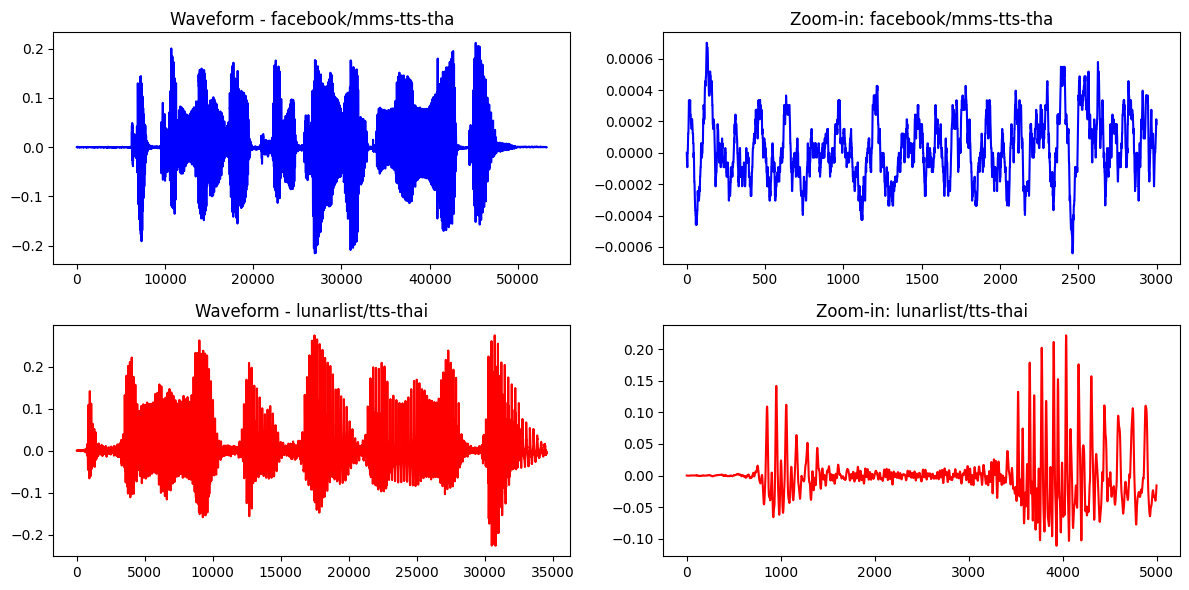

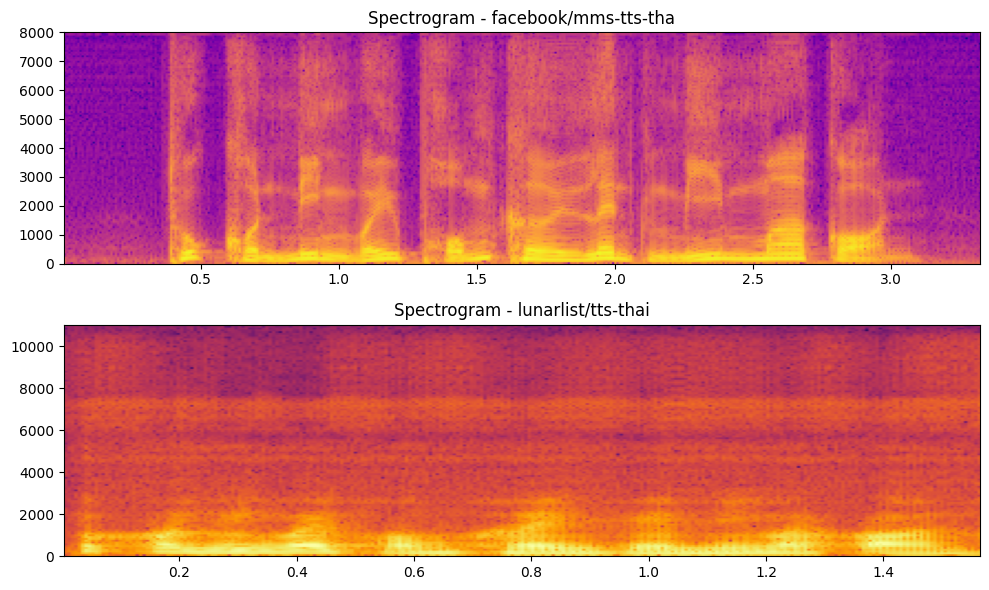

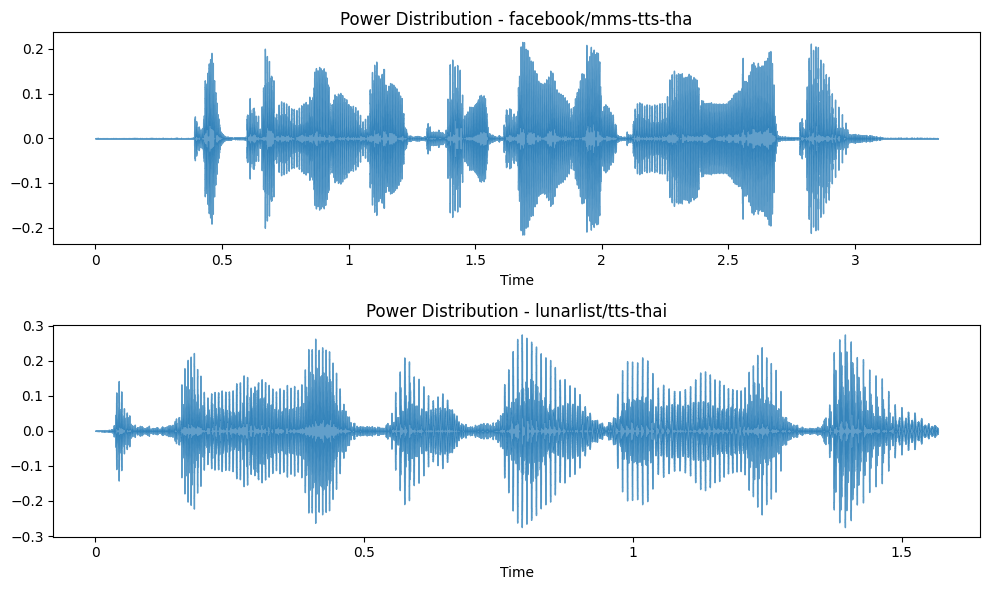

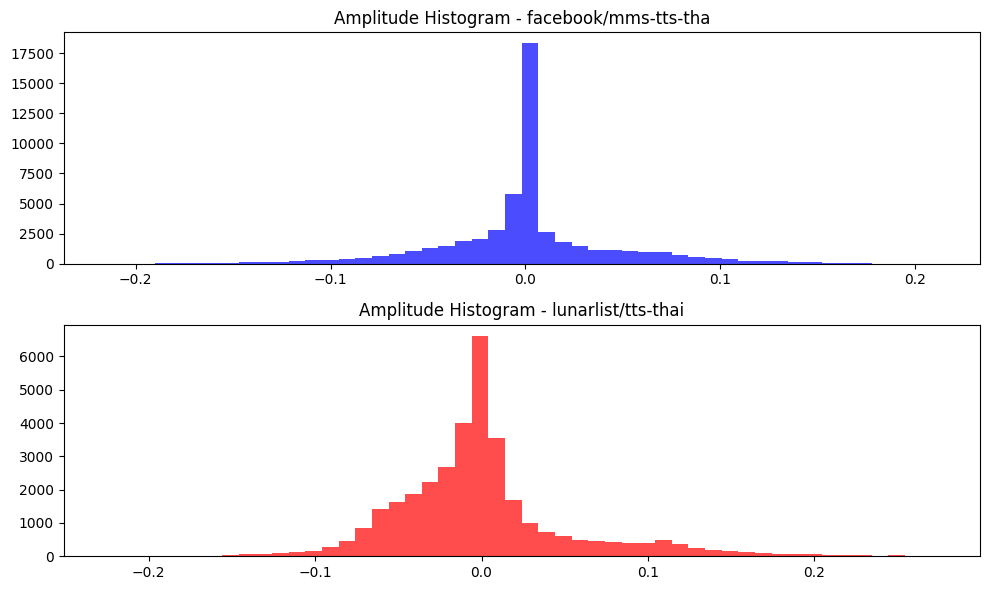


facebook/mms-tts-tha Output:



lunarlist/tts-thai Output:


In [ ]:
import time
import matplotlib.pyplot as plt
import librosa
import librosa.display

text = "ทุกคนนิ่งไว้ ผมเคยเล่นเกมนี้มาก่อน"

print("Loading facebook/mms-tts-tha...")
model_fb = VitsModel.from_pretrained("facebook/mms-tts-tha").to(device)
tokenizer_fb = AutoTokenizer.from_pretrained("facebook/mms-tts-tha")

print("Loading lunarlist/tts-thai...")
model_lunar = Tacotron2Model.from_pretrained("lunarlist/tts-thai").to(device)
vcoder_lunar = UnivNetModel.from_pretrained(model_name="tts_en_libritts_univnet").to(device)

# ฟังก์ชันสำหรับสังเคราะห์เสียง
def generate_audio_facebook(text):
    inputs = tokenizer_fb(text, return_tensors="pt").to(device)
    start_time = time.time()
    with torch.no_grad():
        waveform = model_fb(**inputs).waveform.to("cpu").numpy().squeeze()
    end_time = time.time()
    inference_time = end_time - start_time
    return waveform, inference_time

def generate_audio_lunarlist(text):
    def filter_thai_text(text):
        return "".join([ch for ch in text if ch in model_lunar.hparams["cfg"]['labels']])

    text = filter_thai_text(text)

    dict_idx = {k: i for i, k in enumerate(model_lunar.hparams["cfg"]['labels'])}
    parsed = torch.Tensor([[66] + [dict_idx[i] for i in text if i in dict_idx] + [67]]).int().to(device)

    start_time = time.time()
    with torch.no_grad():
        spectrogram = model_lunar.generate_spectrogram(tokens=parsed).to(device)
        waveform = vcoder_lunar.convert_spectrogram_to_audio(spec=spectrogram).to("cpu").numpy().squeeze()
    end_time = time.time()
    inference_time = end_time - start_time
    return waveform, inference_time

# สร้างเสียงด้วย facebook/mms-tts-tha
wave_fb, time_fb = generate_audio_facebook(text)
sf.write("facebook_tts.wav", wave_fb, 16000)

# สร้างเสียงด้วย lunarlist/tts-thai
wave_lunar, time_lunar = generate_audio_lunarlist(text)
sf.write("lunarlist_tts.wav", wave_lunar, 22050)

# เปรียบเทียบขนาดไฟล์เสียง
size_fb = os.path.getsize("facebook_tts.wav") / 1024  # KB
size_lunar = os.path.getsize("lunarlist_tts.wav") / 1024  # KB

# โหลดไฟล์เสียงเพื่อใช้กับ librosa
y_fb, sr_fb = librosa.load("facebook_tts.wav", sr=16000)
y_lunar, sr_lunar = librosa.load("lunarlist_tts.wav", sr=22050)

# Visualization 1: Waveform + Zoom-in
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

axs[0, 0].plot(y_fb, color="blue")
axs[0, 0].set_title("Waveform - facebook/mms-tts-tha")

axs[1, 0].plot(y_lunar, color="red")
axs[1, 0].set_title("Waveform - lunarlist/tts-thai")

axs[0, 1].plot(y_fb[:3000], color="blue")
axs[0, 1].set_title("Zoom-in: facebook/mms-tts-tha")

axs[1, 1].plot(y_lunar[:5000], color="red")
axs[1, 1].set_title("Zoom-in: lunarlist/tts-thai")

plt.tight_layout()
plt.show()

# Visualization 2: Spectrogram
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].specgram(wave_fb, Fs=16000, cmap="plasma")
axs[0].set_title("Spectrogram - facebook/mms-tts-tha")

axs[1].specgram(wave_lunar, Fs=22050, cmap="inferno")
axs[1].set_title("Spectrogram - lunarlist/tts-thai")

plt.tight_layout()
plt.show()

# Visualization 3: Power Distribution
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

librosa.display.waveshow(y_fb, sr=16000, ax=axs[0], alpha=0.7)
axs[0].set_title("Power Distribution - facebook/mms-tts-tha")

librosa.display.waveshow(y_lunar, sr=22050, ax=axs[1], alpha=0.7)
axs[1].set_title("Power Distribution - lunarlist/tts-thai")

plt.tight_layout()
plt.show()

# Visualization 4: Histogram of Amplitudes
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].hist(y_fb, bins=50, color="blue", alpha=0.7)
axs[0].set_title("Amplitude Histogram - facebook/mms-tts-tha")

axs[1].hist(y_lunar, bins=50, color="red", alpha=0.7)
axs[1].set_title("Amplitude Histogram - lunarlist/tts-thai")

plt.tight_layout()
plt.show()

print("\nfacebook/mms-tts-tha Output:")
display(Audio("facebook_tts.wav", rate=16000))

print("\nlunarlist/tts-thai Output:")
display(Audio("lunarlist_tts.wav", rate=22050))
